In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import datetime
import pandas as pd

from palettable.colorbrewer.diverging import *
from palettable.colorbrewer.sequential import *
from calendar import monthrange

# Topo map

In [2]:
path = "/scratch/summit/erke2265/PRODUCTION/2016_WN/output/grids/a3d_grids_2016.nc"
ds = xr.open_dataset(path)

In [31]:
n_trim = 15 # 15
ds_trim = ds.isel(easting=slice(n_trim, -n_trim))
ds_trim = ds_trim.isel(northing=slice(n_trim, -n_trim))

In [3]:
dem = np.flipud(np.loadtxt("/scratch/summit/erke2265/SNOWPACK_WAIS/input/surface-grids/dem.asc", skiprows=6))
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

In [17]:
# A3D modeling domain edges (x, y)
ul = [ds['easting'].min() / 1000, ds['northing'].max() / 1000]
ur = [ds['easting'].max() / 1000, ds['northing'].max() / 1000]
ll = [ds['easting'].min() / 1000, ds['northing'].min() / 1000]
lr = [ds['easting'].max() / 1000, ds['northing'].min() / 1000]

In [32]:
# A3D analysis domain edges (x, y)
ul_trim = [ds_trim['easting'].min() / 1000, ds_trim['northing'].max() / 1000]
ur_trim = [ds_trim['easting'].max() / 1000, ds_trim['northing'].max() / 1000]
ll_trim = [ds_trim['easting'].min() / 1000, ds_trim['northing'].min() / 1000]
lr_trim = [ds_trim['easting'].max() / 1000, ds_trim['northing'].min() / 1000]

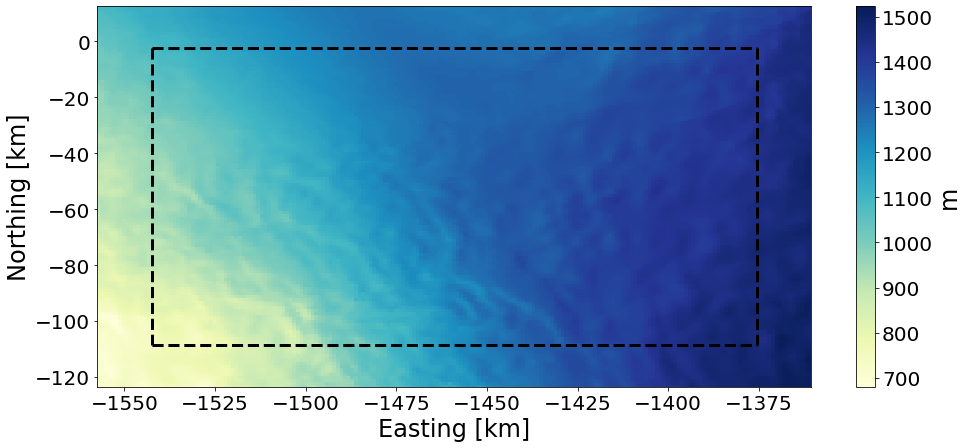

In [38]:
colormap=YlGnBu_9.mpl_colormap

# Draw modeling domain
plt.figure(figsize=(16, 7))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, dem, cmap=colormap, linewidth=0, rasterized=True)
cb = plt.colorbar()
cb.set_label("m", fontsize=24)
cb.ax.tick_params(labelsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=24)
plt.ylabel("Northing [km]", fontsize=24)
# plt.title("ICESat-2 Surface Topography", fontsize=24)

# # Draw modeling domain edge (Alternatively, I can draw red lines in power point)
# plt.plot([ul[0], ll[0]], [ul[1], ll[1]], 'r', linewidth=5)
# plt.plot([ur[0], lr[0]], [ur[1], lr[1]], 'r', linewidth=5)
# plt.plot([ul[0], ur[0]], [ul[1], ur[1]], 'r', linewidth=5)
# plt.plot([ll[0], lr[0]], [ll[1], lr[1]], 'r', linewidth=5)

# Draw analysis domain edge (Alternatively, I can draw red lines in power point)
plt.plot([ul_trim[0], ll_trim[0]], [ul_trim[1], ll_trim[1]], 'k--', linewidth=3)
plt.plot([ur_trim[0], lr_trim[0]], [ur_trim[1], lr_trim[1]], 'k--', linewidth=3)
plt.plot([ul_trim[0], ur_trim[0]], [ul_trim[1], ur_trim[1]], 'k--', linewidth=3)
plt.plot([ll_trim[0], lr_trim[0]], [ll_trim[1], lr_trim[1]], 'k--', linewidth=3)

# Set limits
plt.xlim([ul[0], ur[0]])
plt.ylim([ll[1], ur[1]])


plt.savefig("images/surface_topo.pdf", format='pdf', dpi=100, bbox_inches='tight')
